In [1]:
setwd('C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets')
getwd()

[1] "C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets"

In [2]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [22]:
data(diamonds, iris)
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


In [7]:
pokemon <- read.csv('./pokemon.csv')
head(pokemon)

X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False


<img src = './ggplot2_onevariable.png'/>

# Histogram and frequency polygons

Visualise the distribution of a single continuous variable by dividing the x axis into bins and counting the number of observations in each bin. Histograms (**`geom_histogram()`**) display the counts with bars; frequency polygons (**`geom_freqpoly()`**) display the counts with lines. Frequency polygons are more suitable when you want to compare the distribution across the levels of a categorical variable.

```R
geom_freqpoly(
  mapping = NULL,
  data = NULL,
  stat = "bin",
  position = "identity",
  ...,
  na.rm = FALSE,
  show.legend = NA,
  inherit.aes = TRUE
)

geom_histogram(
  mapping = NULL,
  data = NULL,
  stat = "bin",
  position = "stack",
  ...,
  binwidth = NULL,
  bins = NULL,
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE
)

stat_bin(
  mapping = NULL,
  data = NULL,
  geom = "bar",
  position = "stack",
  ...,
  binwidth = NULL,
  bins = NULL,
  center = NULL,
  boundary = NULL,
  breaks = NULL,
  closed = c("right", "left"),
  pad = FALSE,
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE
)
```

**Arguments**  
`center`, `boundary`  	
bin position specifiers. Only one, center or boundary, may be specified for a single plot. center specifies the center of one of the bins. boundary specifies the boundary between two bins. Note that if either is above or below the range of the data, things will be shifted by the appropriate integer multiple of binwidth. For example, to center on integers use binwidth = 1 and center = 0, even if 0 is outside the range of the data. Alternatively, this same alignment can be specified with binwidth = 1 and boundary = 0.5, even if 0.5 is outside the range of the data.

`breaks`	
Alternatively, you can supply a numeric vector giving the bin boundaries. Overrides binwidth, bins, center, and boundary.

`closed`	
One of "right" or "left" indicating whether right or left edges of bins are included in the bin.

`pad`	
If TRUE, adds empty bins at either end of x. This ensures frequency polygons touch 0. Defaults to FALSE.

# Aesthetic

**`geom_histogram()`** uses the same aesthetics as **`geom_bar()`**; **`geom_freqpoly()`** uses the same aesthetics as **`geom_line()`**.

# Example

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


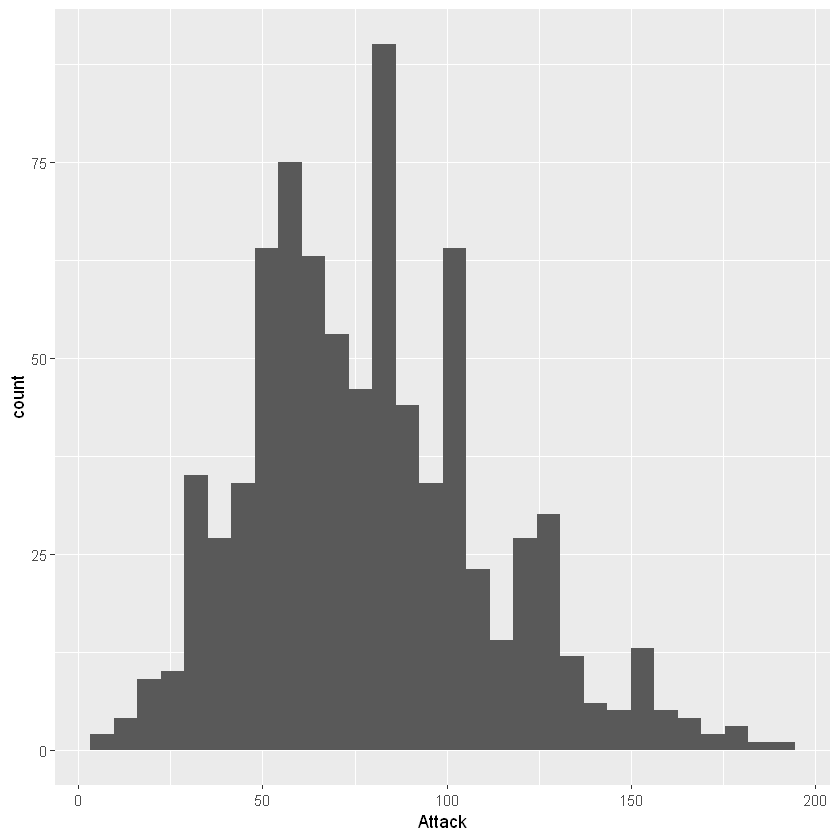

In [9]:
ggplot(pokemon, aes(Attack)) +
geom_histogram()

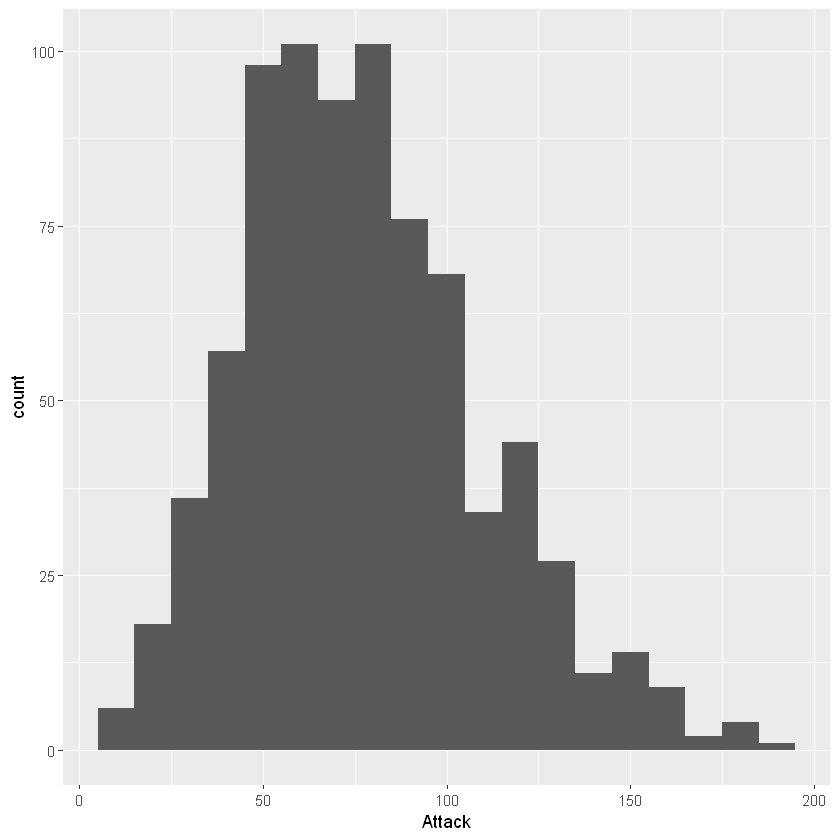

In [10]:
#setting bin width to 10
ggplot(pokemon, aes(Attack)) +
geom_histogram(binwidth = 10)

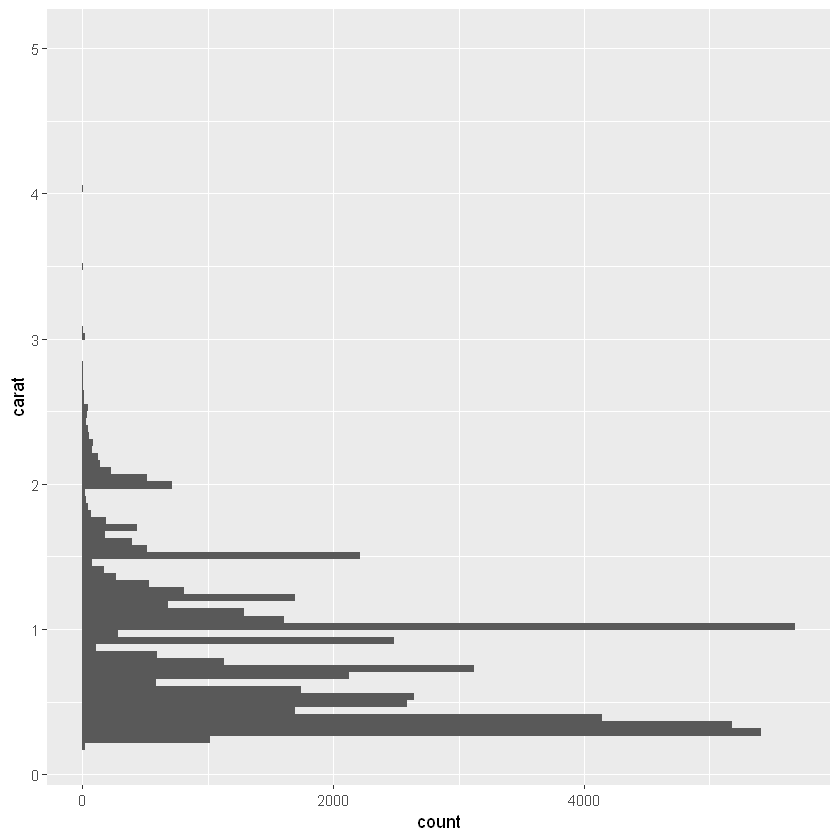

In [11]:
#horizontal, 100 bins
ggplot(diamonds, aes(y = carat)) +
geom_histogram(bins = 100)

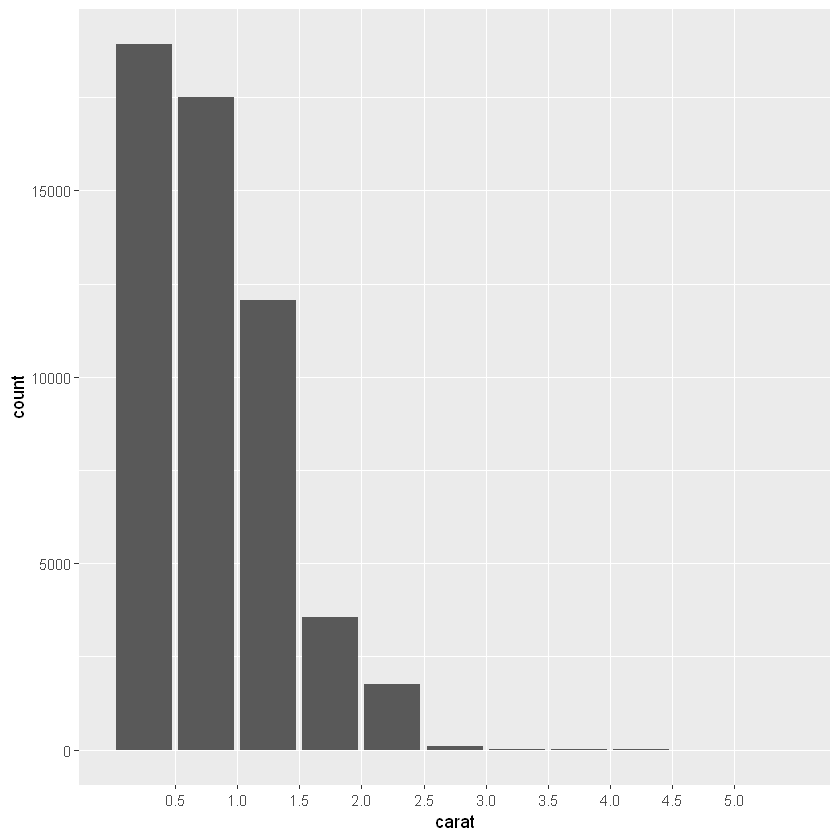

In [12]:
# For histograms with tick marks between each bin, use `geom_bar` with
# `scale_x_binned`.
ggplot(diamonds, aes(carat)) +
  geom_bar() +
  scale_x_binned()

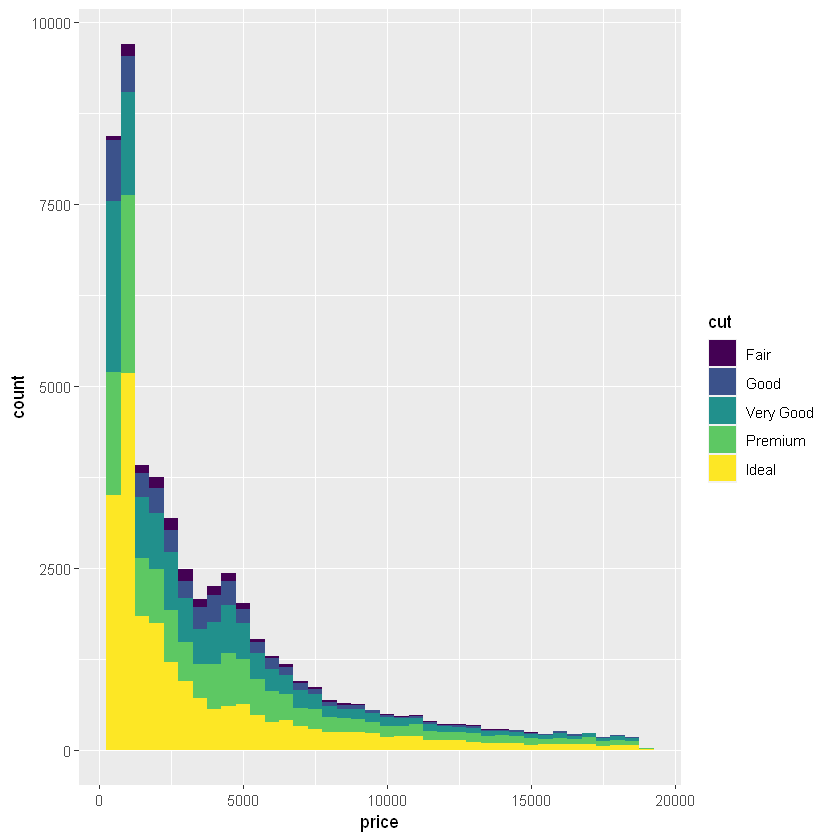

In [15]:
# Rather than stacking histograms, it's easier to compare frequency
# polygons
ggplot(diamonds, aes(price, fill = cut)) +
  geom_histogram(binwidth = 500)

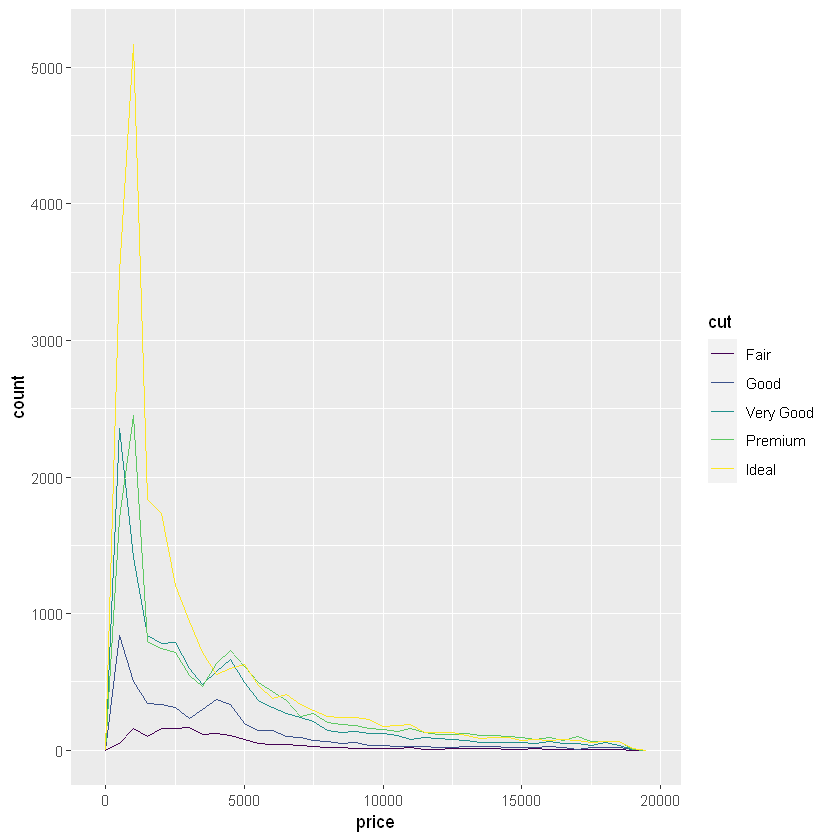

In [20]:
ggplot(diamonds, aes(price, color = cut)) +
geom_freqpoly(binwidth = 500)

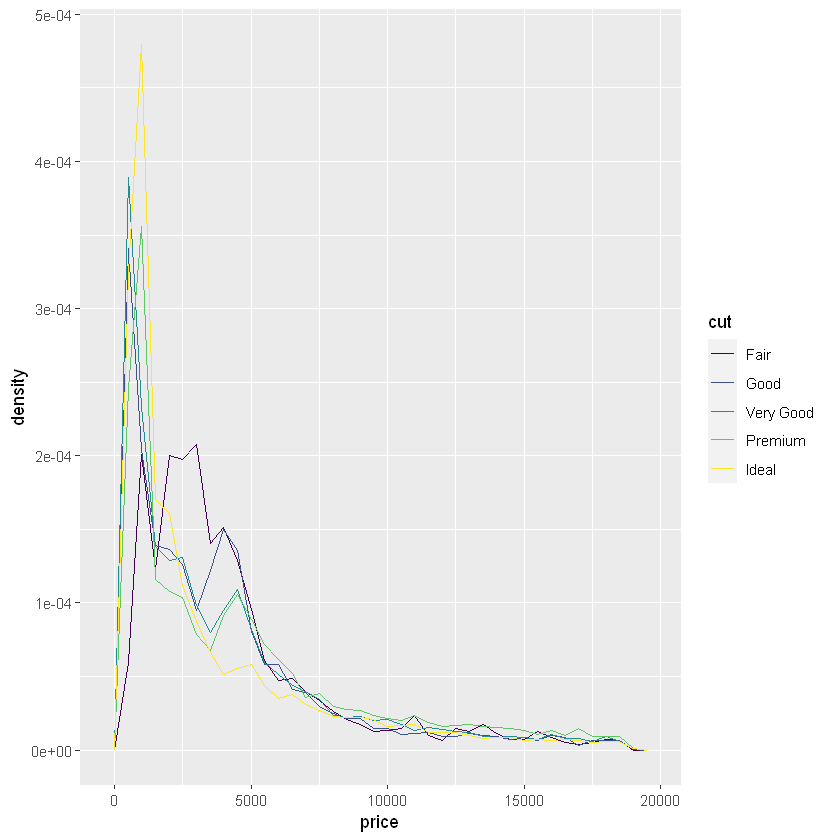

In [21]:
# To make it easier to compare distributions with very different counts,
# put density on the y axis instead of the default count
ggplot(diamonds, aes(price, after_stat(density), colour = cut)) +
  geom_freqpoly(binwidth = 500)

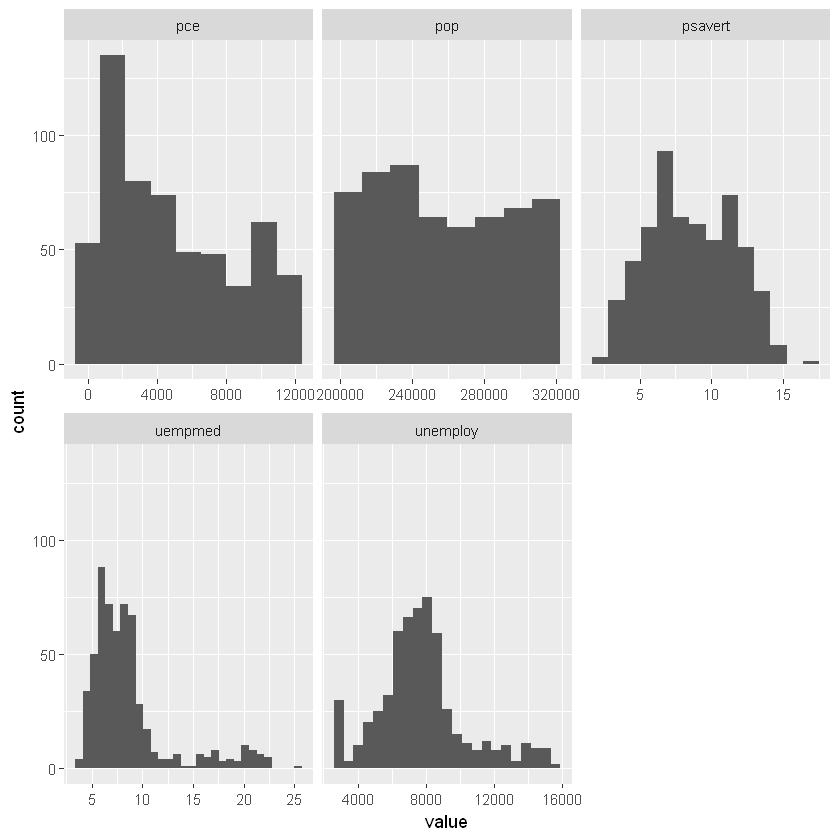

In [26]:
# You can specify a function for calculating binwidth, which is
# particularly useful when faceting along variables with
# different ranges because the function will be called once per facet
ggplot(economics_long, aes(value)) +
facet_wrap(~variable, scales = 'free_x') +
geom_histogram(binwidth = function(x) 2 * IQR(x) / (length(x)^(1/3)))

# **Computed variables**

`count`
number of points in bin

`density`
density of points in bin, scaled to integrate to 1

`ncount`
count, scaled to maximum of 1

`ndensity`
density, scaled to maximum of 1

<b style = 'color:red'>Accessing a computed value using: **`..name..`**

In [5]:
library(dslabs)
library(dplyr)
head(heights)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



sex,height
Male,75
Male,70
Male,68
Male,74
Male,61
Female,65


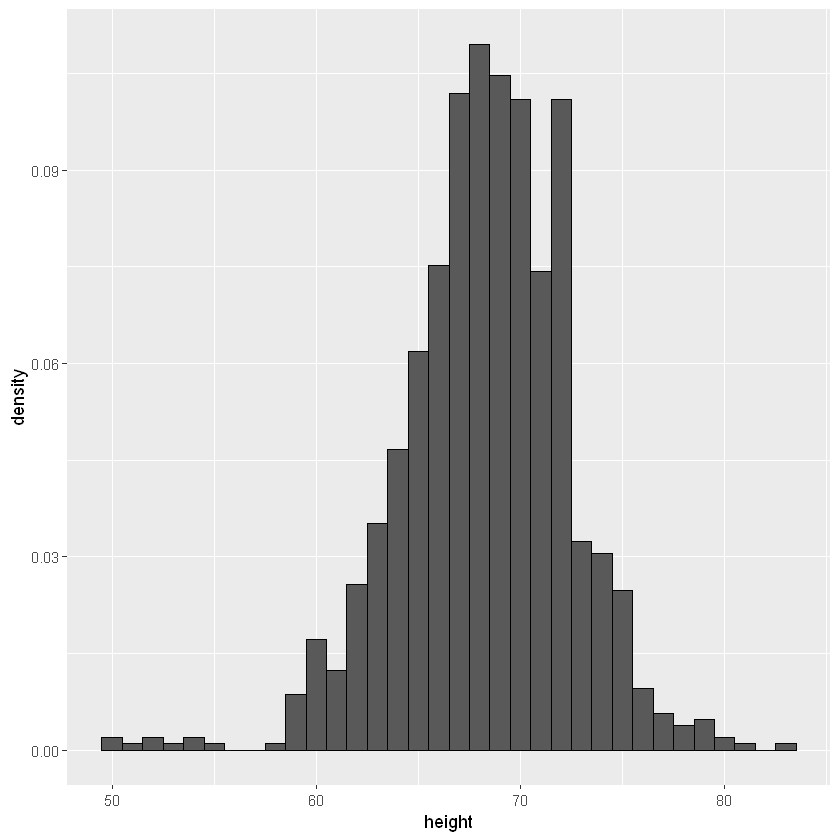

In [6]:
#Create a density histogram, instead of a frequency histogram
heights %>%
ggplot(aes(height)) +
geom_histogram(aes(y = ..density..), color = 'black', binwidth = 1)